In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

np.random.seed(1337)
import torch

torch.manual_seed(1337)
plt.style.use("bmh")  # Example: Applying the 'ggplot' style

import pytesseract
from PIL import Image, ImageEnhance
from torchmetrics.text.cer import CharErrorRate
from torchmetrics.text.wer import WordErrorRate

pytesseract.pytesseract.tesseract_cmd = R"C:\Program Files\Tesseract-OCR\tesseract.exe"
brightness_and_contrast = []
for contrast in np.arange(1, 5, 0.05):
    brightness_and_contrast.append((1.0, contrast))
for brightness in np.arange(1, 3.25, 0.05):
    brightness_and_contrast.append((brightness, 2.5))

original_image = Image.open("data/samples/sample.jpg").convert("L")
target = " ".join(open("data/samples/sample.gt.txt", "r").read().splitlines())

records = []
for brightness, contrast in brightness_and_contrast:
    image = original_image.copy()
    image = ImageEnhance.Brightness(image).enhance(brightness)  # Increase brightness
    image = ImageEnhance.Contrast(image).enhance(contrast)  # Increase contrast

    text = pytesseract.image_to_string(image, lang="hye")
    preds = " ".join(text.splitlines())

    cer = CharErrorRate()
    wer = WordErrorRate()
    records.append(
        {
            "brightness": brightness,
            "contrast": contrast,
            "cer": cer(preds, target).item(),
            "wer": wer(preds, target).item(),
        }
    )
df = pd.DataFrame.from_records(records)

FileNotFoundError: [Errno 2] No such file or directory: 'build/figures/cer.svg'

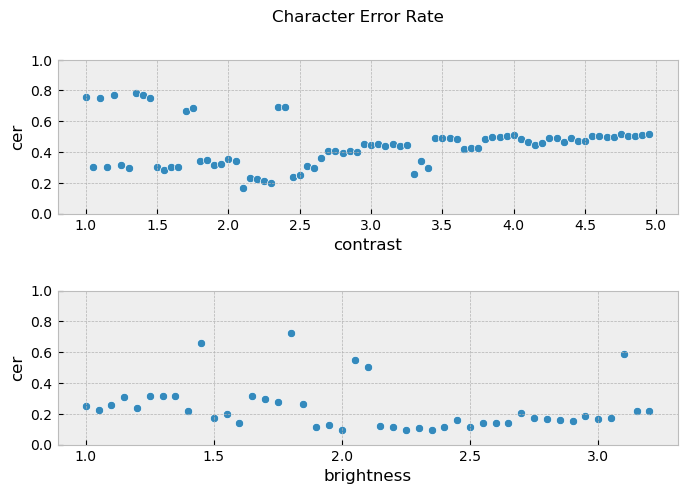

In [13]:
import seaborn as sns
fig, axes = plt.subplots(2, 1, figsize=(8, 5))
fig.suptitle("Character Error Rate")
plt.subplots_adjust(hspace=0.5)
axes[0] = sns.scatterplot(df[df.brightness == 1.0], x="contrast", y="cer", ax=axes[0])
axes[1] = sns.scatterplot(df[df.contrast == 2.5], x="brightness", y="cer", ax=axes[1])
axes[0].set_ylim([0, 1])
axes[1].set_ylim([0, 1])
fig.savefig("build/figures/cer.svg")

In [ ]:
image = Image.open("test/samples/sample.jpg").convert("L")
image = ImageEnhance.Brightness(image).enhance(2.5)  # Increase brightness
image = ImageEnhance.Contrast(image).enhance(2.5)  # Increase contrast
text = pytesseract.image_to_string(image, lang="hye")
print(text)
cer = CharErrorRate()
preds = " ".join(text.split("\n"))
cer([preds], [target]).item()

Բեր ձայրենակիցներեն չատերը շփոխութետն մէջ էն ինքնու
թեան թԹուղն երու, անցագրի են. մասին, մանաւանդ որ վերջերս նոր
կարդադրությիւններ եղան:



0.12030075490474701

In [ ]:
from difflib import Differ

text1 = """Մեը հայրենակիցնեըէն շատերը շփոթութեան մէջ են ինքնու
թեան թուղթերու, անցագրի ևն. մասին, մանաւանդ որ վերջերս նոր
կարգագրութիւններ եղան:""".splitlines(
    keepends=True
)
text2 = """Բեր ձայրենակիցներեն չատերը շփոխութետն մէջ էն ինքնու
թեան թԹուղն երու, անցագրի են. մասին, մանաւանդ որ վերջերս նոր
կարդադրությիւններ եղան:""".splitlines(
    keepends=True
)

d = Differ()
result = list(d.compare(text1, text2))
from pprint import pprint

for x in result:
    print(x)

- Մեը հայրենակիցնեըէն շատերը շփոթութեան մէջ են ինքնու

? ^ ^ ^           ^^  ^         ^    ^      ^

+ Բեր ձայրենակիցներեն չատերը շփոխութետն մէջ էն ինքնու

? ^ ^ ^           ^^  ^         ^    ^      ^

- թեան թուղթերու, անցագրի ևն. մասին, մանաւանդ որ վերջերս նոր

?          ^              ^

+ թեան թԹուղն երու, անցագրի են. մասին, մանաւանդ որ վերջերս նոր

?       +   ^^              ^

- կարգագրութիւններ եղան:
?    ^ ^

+ կարդադրությիւններ եղան:
?    ^ ^    +



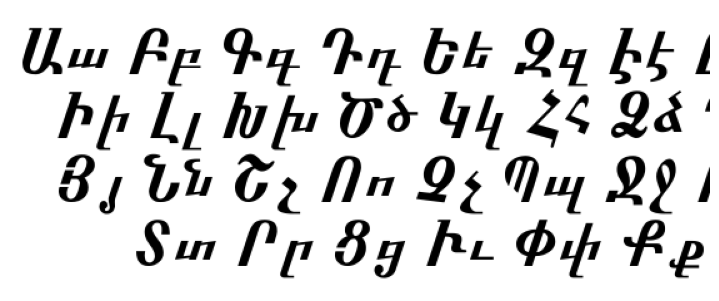

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw, ImageFilter, ImageFont

caps = range(0x531, 0x557)
smalls = range(0x561, 0x588)
alphabet = [f"{chr(a)}{chr(b)}" for (a, b) in zip(caps, smalls)]
alphabet = [" ".join(alphabet[i : i + 10]) + "\n" for i in range(0, len(alphabet), 10)]
alphabet = " ".join(alphabet)
# Աա Բբ Գգ Դդ Եե Զզ Էէ Ըը Թթ Ժժ
# Իի Լլ Խխ Ծծ Կկ Հհ Ձձ Ղղ Ճճ Մմ
# Յյ Նն Շշ Ոո Չչ Պպ Ջջ Ռռ Սս Վվ
# Տտ Րր Ցց Ււ Փփ Քք Օօ Ֆֆ

image = Image.new("L", size=(560, 225), color=255)
draw = ImageDraw.Draw(image)
font = ImageFont.truetype(R"hynet/fonts/Mk_Parz_U-Italic.ttf", 51)
draw.text((10, 0), alphabet, font=font, fill=0, align="center")
plt.imshow(image, cmap="gray")
plt.axis("off")
plt.tight_layout()
plt.gcf().set_size_inches(10, 3)

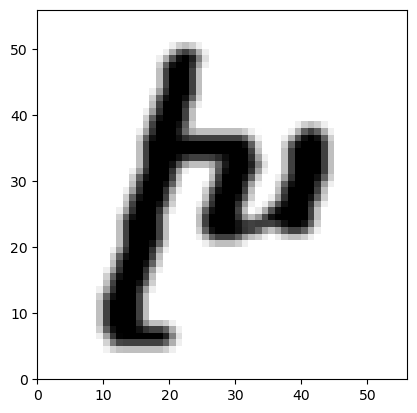

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import torch
from PIL import Image, ImageDraw, ImageFilter, ImageFont

N = 56  # 56x56 pixels
character = "խ"
image = Image.new("L", size=(N, N), color=255)
draw = ImageDraw.Draw(image)
font = ImageFont.truetype("hynet/fonts/Mk_Parz_U-Italic.ttf", 51)
x0, y0, x1, y1 = font.getbbox(character)
draw.text(
    (-x0 + (N - (x1 - x0)) / 2, -y0 + (N - (y1 - y0)) / 2),  # center
    character,
    font=font,
    fill=0,
)
image = image.rotate(5, fillcolor=255)  # default 0
image = image.filter(ImageFilter.ModeFilter(2))  # default 0
image = image.filter(ImageFilter.BoxBlur(0.5))  # default 0
pixel_values = list(image.getdata())
T = torch.tensor(pixel_values, dtype=torch.float32) / 255.0
T = T.view((1, N, N))  # network input
data = np.array(image)
extent = [0, data.shape[1], 0, data.shape[0]]
plt.imshow(data, extent=extent, origin="upper", cmap="gray")
# plt.tight_layout()
# plt.gcf().set_size_inches(10, 3)
plt.savefig(
    R"C:\Users\Romain\OneDrive\Documents\Repos\v4nn4.github.io\assets\images\network_input.svg"
)

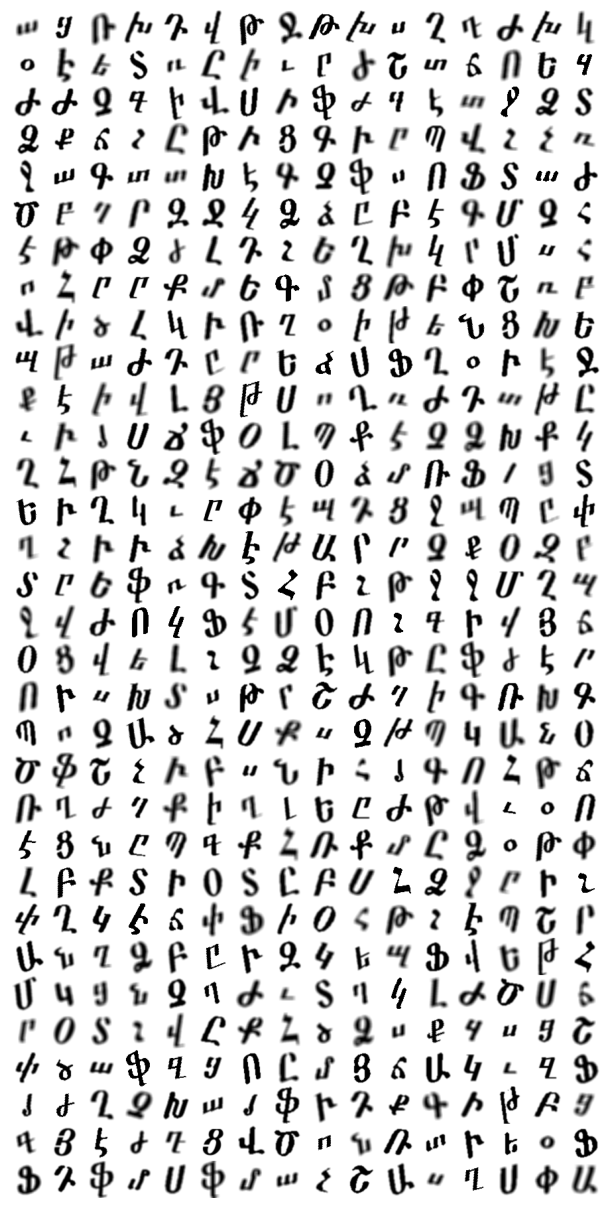

In [ ]:
import os
import pickle

import torch
from torch.utils.data import DataLoader

path = "build/datasets/hynet"
train_dataset = pickle.load(open(os.path.join(path, "train_dataset.pkl"), "rb"))
batch_size = 16
train_dataloader = DataLoader(
    train_dataset, batch_size=batch_size, shuffle=True, drop_last=True
)
nb_batches = 32
X = torch.zeros((N * nb_batches, N * batch_size))
for i, (inputs, _) in enumerate(train_dataloader):
    if i < nb_batches:
        for j, T in enumerate(inputs):
            X[i * N : (i + 1) * N, j * N : (j + 1) * N] = T.view(N, N)
plt.figure(figsize=(30, 60))
plt.imshow(X, cmap="gray")
plt.axis("off")
plt.tight_layout()
plt.gcf().set_size_inches(6, 12)